In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [16]:
data = pd.read_csv("T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [18]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [19]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

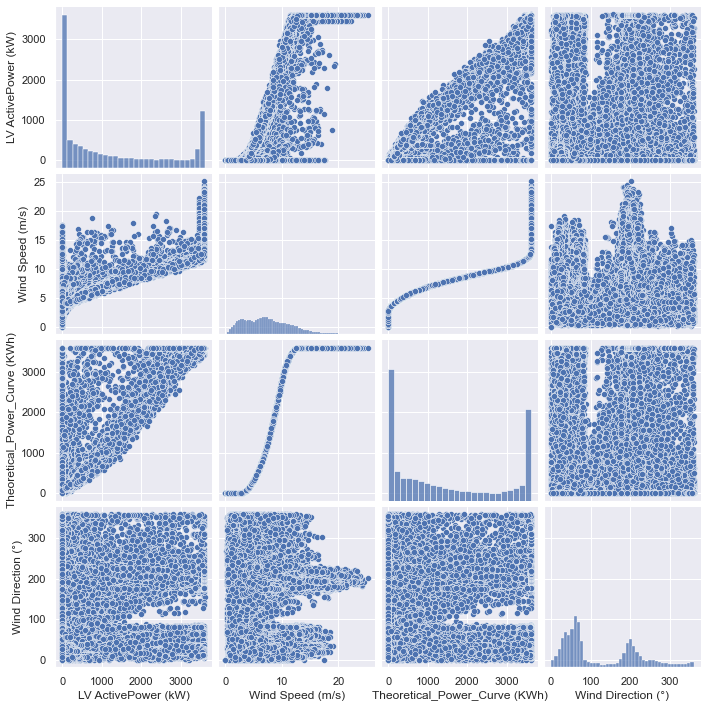

In [20]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

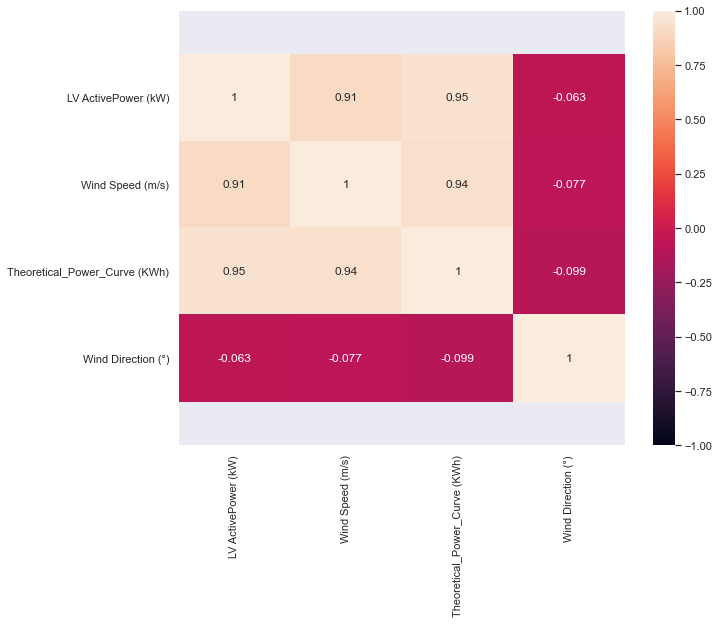

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [21]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

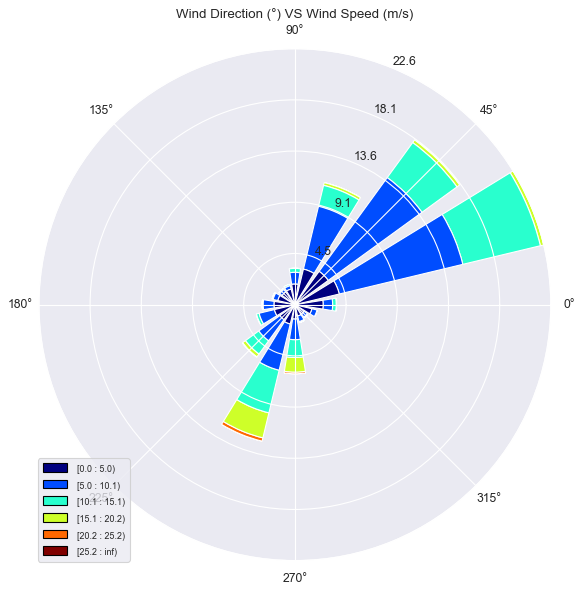

In [23]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [24]:
# Spliting the date time in year, month, days, hours and minutes
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


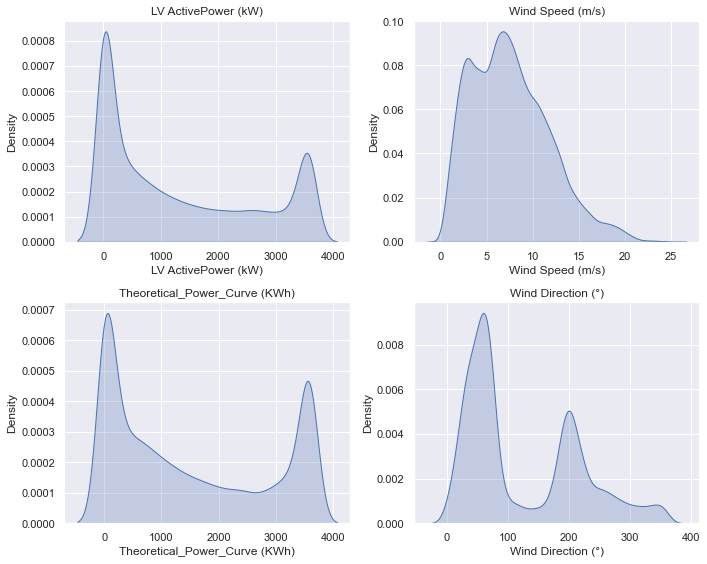

In [25]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [26]:
# droping all the null values from the data
data = data.dropna()

In [27]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


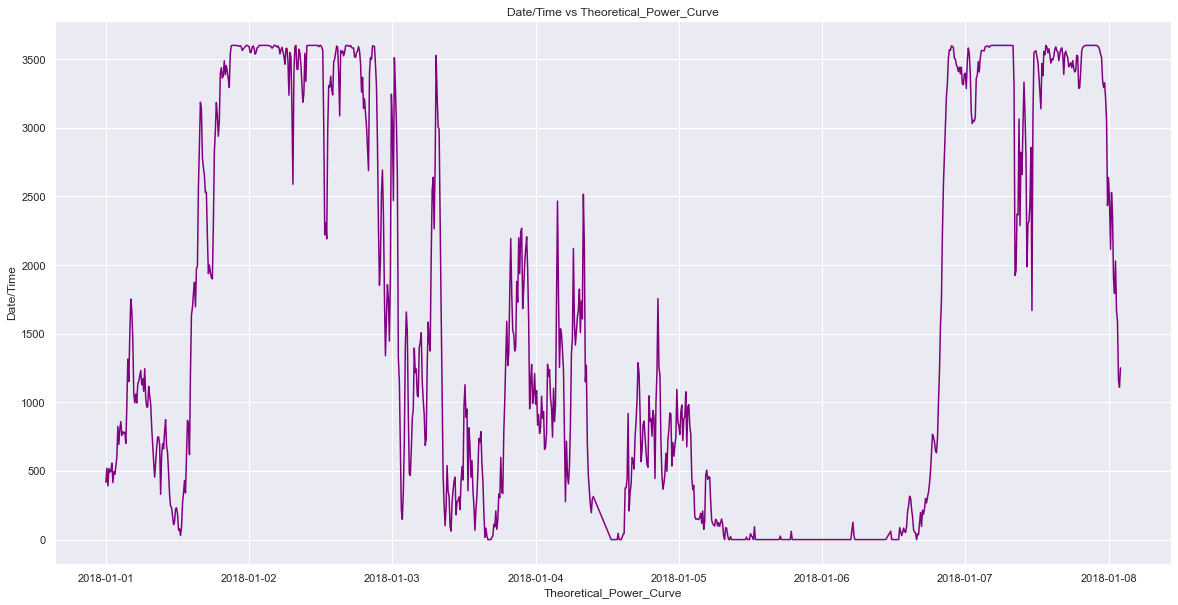

In [28]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [29]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [30]:
df = data.copy()

In [31]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-31-66b0dd25839b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [32]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [33]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [34]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [35]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [36]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [37]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [38]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]


In [39]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)


In [40]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [41]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [42]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [43]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [44]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [45]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [46]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [47]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 43s 874us/step - loss: 0.0055


In [48]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=3608.434428, Expected=3600.000000
Hour=2, Predicted=3609.366364, Expected=3600.000000
Hour=3, Predicted=3609.353682, Expected=3600.000000
Hour=4, Predicted=3609.225258, Expected=2506.112948
Hour=5, Predicted=2515.050323, Expected=1954.282949
Hour=6, Predicted=1963.033472, Expected=1128.684225
Hour=7, Predicted=1137.124657, Expected=2087.002742
Hour=8, Predicted=2095.377098, Expected=1497.144149
Hour=9, Predicted=1505.205149, Expected=3143.880909
Hour=10, Predicted=3151.754238, Expected=3257.240200
Hour=11, Predicted=3265.151925, Expected=3099.589351
Hour=12, Predicted=3107.420548, Expected=2288.732261
Hour=13, Predicted=2296.483595, Expected=2851.196746
Hour=14, Predicted=2859.011126, Expected=2285.016857
Hour=15, Predicted=2292.855765, Expected=1861.757477
Hour=16, Predicted=1869.393081, Expected=2366.628323
Hour=17, Predicted=2374.224577, Expected=1708.423896
Hour=18, Predicted=1715.962070, Expected=2470.838153
Hour=19, Predicted=2478.104678, Expected=1945.646150
Ho

Hour=155, Predicted=2102.780235, Expected=1238.844870
Hour=156, Predicted=1245.806146, Expected=2436.504152
Hour=157, Predicted=2443.465429, Expected=1829.369330
Hour=158, Predicted=1836.330607, Expected=2808.873842
Hour=159, Predicted=2815.835120, Expected=2443.197451
Hour=160, Predicted=2450.158728, Expected=1807.169085
Hour=161, Predicted=1814.130362, Expected=3128.215862
Hour=162, Predicted=3135.177139, Expected=2663.481637
Hour=163, Predicted=2670.442914, Expected=3013.534684
Hour=164, Predicted=3020.495961, Expected=2699.478367
Hour=165, Predicted=2706.439644, Expected=2512.232043
Hour=166, Predicted=2519.193320, Expected=2132.398669
Hour=167, Predicted=2139.359946, Expected=1498.471175
Hour=168, Predicted=1505.432452, Expected=2072.762765
Hour=169, Predicted=2079.724042, Expected=1555.808022
Hour=170, Predicted=1562.769299, Expected=2304.673182
Hour=171, Predicted=2311.634459, Expected=2914.007032
Hour=172, Predicted=2920.968309, Expected=1802.451426
Hour=173, Predicted=1809.412

Hour=322, Predicted=234.769840, Expected=216.293668
Hour=323, Predicted=223.254945, Expected=99.450182
Hour=324, Predicted=106.411459, Expected=0.000000
Hour=325, Predicted=6.961277, Expected=0.000000
Hour=326, Predicted=6.961277, Expected=0.000000
Hour=327, Predicted=6.961277, Expected=0.000000
Hour=328, Predicted=6.961277, Expected=0.000000
Hour=329, Predicted=6.961277, Expected=0.000000
Hour=330, Predicted=6.961277, Expected=0.000000
Hour=331, Predicted=6.961277, Expected=0.000000
Hour=332, Predicted=6.961277, Expected=0.000000
Hour=333, Predicted=6.961277, Expected=39.921123
Hour=334, Predicted=46.882400, Expected=23.053693
Hour=335, Predicted=30.014970, Expected=0.000000
Hour=336, Predicted=6.961277, Expected=0.000000
Hour=337, Predicted=6.961277, Expected=0.000000
Hour=338, Predicted=6.961277, Expected=0.000000
Hour=339, Predicted=6.961277, Expected=19.084863
Hour=340, Predicted=26.046140, Expected=22.032280
Hour=341, Predicted=28.993557, Expected=21.340310
Hour=342, Predicted=28

Hour=488, Predicted=6.961277, Expected=0.000000
Hour=489, Predicted=6.961277, Expected=0.000000
Hour=490, Predicted=6.961277, Expected=0.000000
Hour=491, Predicted=6.961277, Expected=0.000000
Hour=492, Predicted=6.961277, Expected=0.000000
Hour=493, Predicted=6.961277, Expected=0.000000
Hour=494, Predicted=6.961277, Expected=0.000000
Hour=495, Predicted=6.961277, Expected=0.000000
Hour=496, Predicted=6.961277, Expected=0.000000
Hour=497, Predicted=6.961277, Expected=0.000000
Hour=498, Predicted=6.961277, Expected=0.000000
Hour=499, Predicted=6.961277, Expected=0.000000
Hour=500, Predicted=6.961277, Expected=0.000000
Hour=501, Predicted=6.961277, Expected=0.000000
Hour=502, Predicted=6.961277, Expected=0.000000
Hour=503, Predicted=6.961277, Expected=0.000000
Hour=504, Predicted=6.961277, Expected=0.000000
Hour=505, Predicted=6.961277, Expected=0.000000
Hour=506, Predicted=6.961277, Expected=0.000000
Hour=507, Predicted=6.961277, Expected=0.000000
Hour=508, Predicted=6.961277, Expected=0

Hour=650, Predicted=1324.987163, Expected=1185.293107
Hour=651, Predicted=1192.254384, Expected=777.032792
Hour=652, Predicted=783.994069, Expected=846.153391
Hour=653, Predicted=853.114668, Expected=1016.492244
Hour=654, Predicted=1023.453521, Expected=1124.104475
Hour=655, Predicted=1131.065752, Expected=1201.518685
Hour=656, Predicted=1208.479962, Expected=893.924972
Hour=657, Predicted=900.886249, Expected=792.220968
Hour=658, Predicted=799.182245, Expected=1334.844912
Hour=659, Predicted=1341.806189, Expected=960.705481
Hour=660, Predicted=967.666759, Expected=829.427996
Hour=661, Predicted=836.389273, Expected=664.793880
Hour=662, Predicted=671.755157, Expected=485.949172
Hour=663, Predicted=492.910449, Expected=304.877781
Hour=664, Predicted=311.839058, Expected=252.603050
Hour=665, Predicted=259.564327, Expected=192.950995
Hour=666, Predicted=199.912272, Expected=272.888864
Hour=667, Predicted=279.850141, Expected=194.028538
Hour=668, Predicted=200.989815, Expected=201.020308
H

Hour=815, Predicted=6.961277, Expected=0.000000
Hour=816, Predicted=6.961277, Expected=0.000000
Hour=817, Predicted=6.961277, Expected=0.000000
Hour=818, Predicted=6.961277, Expected=17.348554
Hour=819, Predicted=24.309831, Expected=0.000000
Hour=820, Predicted=6.961277, Expected=0.000000
Hour=821, Predicted=6.961277, Expected=0.000000
Hour=822, Predicted=6.961277, Expected=0.000000
Hour=823, Predicted=6.961277, Expected=0.000000
Hour=824, Predicted=6.961277, Expected=0.000000
Hour=825, Predicted=6.961277, Expected=0.000000
Hour=826, Predicted=6.961277, Expected=0.000000
Hour=827, Predicted=6.961277, Expected=23.699323
Hour=828, Predicted=30.660600, Expected=33.396457
Hour=829, Predicted=40.357734, Expected=144.464714
Hour=830, Predicted=151.425991, Expected=64.254790
Hour=831, Predicted=71.216067, Expected=0.000000
Hour=832, Predicted=6.961277, Expected=0.000000
Hour=833, Predicted=6.961277, Expected=0.000000
Hour=834, Predicted=6.961277, Expected=0.000000
Hour=835, Predicted=6.961277

Hour=989, Predicted=1615.704664, Expected=1251.008410
Hour=990, Predicted=1257.969687, Expected=1254.728650
Hour=991, Predicted=1261.689927, Expected=1376.495123
Hour=992, Predicted=1383.456400, Expected=2135.288428
Hour=993, Predicted=2142.249705, Expected=2601.071371
Hour=994, Predicted=2608.032648, Expected=1827.149165
Hour=995, Predicted=1834.110442, Expected=2543.911219
Hour=996, Predicted=2550.872496, Expected=1811.263260
Hour=997, Predicted=1818.224537, Expected=1787.100338
Hour=998, Predicted=1794.061615, Expected=2777.504103
Hour=999, Predicted=2784.465380, Expected=3025.199012
Hour=1000, Predicted=3032.160289, Expected=3161.693967


In [49]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   1400      
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [50]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4622355997410618


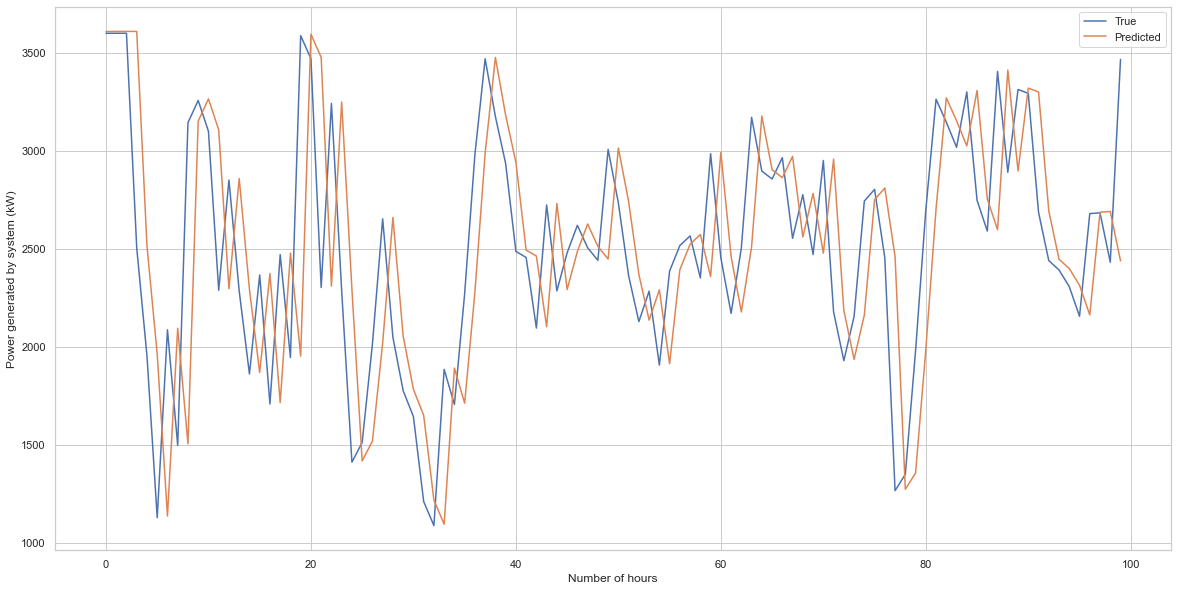

In [51]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()